<a href="https://colab.research.google.com/github/MathMachado/DSWP/blob/master/Notebooks/NB10_04__3DP_5_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b><i>3DP_5 - FEATURE SELECTION</i></b></h1></center>



# **AGENDA**:

> Consulte **Table of contents**.



# **Melhorias da sessão**
* Desenvolver t-SNE.
* https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

___
# **Referências**
* [Feature Selection in Python — Recursive Feature Elimination](https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15)
* [Feature Selection with sklearn and Pandas](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

___
# **CHEETSHEET**


![Scikit-Learn](https://github.com/MathMachado/Materials/blob/master/scikit-learn-1.png?raw=true)



___
# **3DP_FEATURE SELECTION**
## Introdução à Feature Selection
> Nosso objetivo com Feature Engineering será:
* Deletar colunas irrelevantes;
* Deletar colunas com baixa correlação com a variável-target;
* Deletar colunas com baixa variância;
* Deletar colunas com muitos NaN's.

* Sugestões:
    * Normalize colunas numéricas;
    * Aplique LabelEncoding (colunas numéricas) ou One Hot Encoding (colunas categóricas).

![FeatureSelection](https://github.com/MathMachado/Materials/blob/master/FeatureSelection.png?raw=true)

[Fonte](https://medium.com/@sundarstyles89/weight-of-evidence-and-information-value-using-python-6f05072e83eb)

In [66]:
from sklearn import feature_selection # Library para seleção de features
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

___
# **VarianceThreshold**
* Drop variáveis/features cuja variância seja inferior a um determinado threshold;
* Este é um método não-supervisionado, isto é, a variável rotulada (variável-resposta ou variável target) não entra e ação;
* **Intuição**: 
    * Features/variáveis com baixa variância contem baixa informação;
* **Como funciona**:
    * Calcula a variância para cada feature/variável e então deleta a coluna/variável com baixa variância
* **Cuidados**:
    * Assegure-se que as features/variáveis tenham a mesma escala. Ou seja, use StandardScaler() ou MinMaxScaler() para colocar as variáveis na mesma escala.

In [73]:
np.random.seed(20111974)

l_dia_semana = ['seg', 'ter', 'qua', 'qui', 'sex']
d_simulacao = {'produto_a': np.round(np.random.normal(100, 10, size = 100), 4),
               'produto_b': np.round(np.random.normal(10, 1.0, size = 100), 4),
               'produto_c': np.round(np.random.normal(50, 0.5, size = 100), 4),
               'dia_semana': np.random.choice(l_dia_semana, 100)}

df = pd.DataFrame(d_simulacao)
df.head()

,produto_a,produto_b,produto_c,dia_semana
0,125.0628,9.7991,50.9660,qui
1,111.1440,8.7281,50.2374,ter
2,120.5566,10.1573,49.8809,seg
3,105.6482,8.8778,49.8930,qua
4,102.9897,10.1549,50.1266,ter


In [74]:
df.describe()

,produto_a,produto_b,produto_c
count,100.000000,100.000000,100.000000
mean,99.830035,9.909787,50.057685
std,10.106275,0.974914,0.494236
min,79.400400,7.167600,48.826300
25%,92.163850,9.187350,49.755925
50%,98.779500,9.849950,50.093600
75%,107.194750,10.528925,50.398950
max,125.062800,12.876500,51.372400


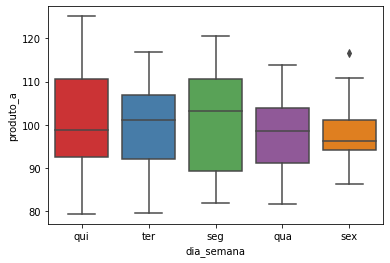

In [75]:
import seaborn as sns

# Boxplot para produto_a
sns.boxplot(x = "dia_semana", y = "produto_a", data = df, palette = "Set1")

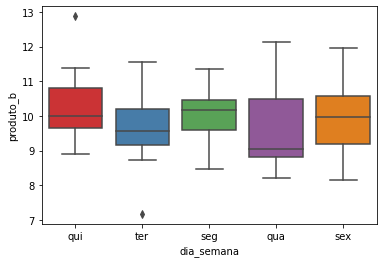

In [76]:
# Boxplot para produto_b
sns.boxplot(x = "dia_semana", y = "produto_b", data = df, palette = "Set1")

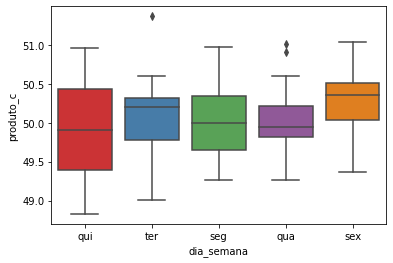

In [77]:
# Boxplot para produto_c
sns.boxplot(x = "dia_semana", y = "produto_c", data = df, palette = "Set1")

In [84]:
# Calculando as variâncias de cada Feature/variável:
l_variaveis= ['produto_a', 'produto_b', 'produto_c']
print(f'Variância das variáveis do dataframe df:')
for coluna in l_variaveis:
    print(f'{coluna}: {round(df[coluna].var(), 2)}')

Variância das variáveis do dataframe df:
produto_a: 102.14
produto_b: 0.95
produto_c: 0.24


In [85]:
# Selecionar atributos cuja variância seja maior que 0.25:
vt = feature_selection.VarianceThreshold(threshold = .25)
vt.fit_transform(df[['produto_a', 'produto_b', 'produto_c']])

array([[125.0628,   9.7991],
       [111.144 ,   8.7281],
       [120.5566,  10.1573],
       [105.6482,   8.8778],
       [102.9897,  10.1549],
       [110.4931,  10.3613],
       [ 98.7393,  10.5335],
       [110.6228,  10.1884],
       [111.3807,   9.3947],
       [113.7966,  10.5274],
       [ 79.4004,   9.4973],
       [106.7475,   9.8465],
       [107.2723,   9.1916],
       [ 96.6076,  10.8666],
       [104.3613,  11.1262],
       [105.9135,  10.8768],
       [ 87.0718,   9.0921],
       [111.7712,  11.37  ],
       [ 90.1356,  10.1296],
       [ 82.0966,   9.477 ],
       [ 89.1086,  10.242 ],
       [ 90.9287,  11.3869],
       [ 89.7709,   9.9663],
       [ 86.3554,   9.2274],
       [ 97.0571,  11.51  ],
       [100.6344,   8.9578],
       [ 88.5804,  10.4898],
       [ 94.9294,  10.3248],
       [ 91.6461,   8.9788],
       [ 85.8507,   8.7534],
       [ 97.8409,  11.2866],
       [ 88.3481,  10.2776],
       [ 93.9232,   8.4584],
       [ 93.8489,   9.2714],
       [110.77

In [86]:
# Variância calculada pela VarianceThreshold()
vt.variances_

array([101.11542812,   0.94095325,   0.24182679])

### O que aconteceu aqui? Qual a conclusão?

___
# **ANOVA (Analysis Of Variance) com f_classif**
* Aplica-se aos casos em que as colunas a serem testadas sejam numéricas por natureza e a variável-target seja discreta por natureza;
* ANOVA é um teste que visa medir diferença entre grupos/experimentos. Aqui, **o propósito da ANOVA é testar se as colunas numéricas testadas são diferentes**. Obviamente que ao identificarmos colunas semelhantes, então podemos reduzir o número de colunas para evitarmos multicolinearidade, overfitting.

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

In [ ]:
X_cancer

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y_cancer # A variável-resposta é do tipo binária --> Este é um problema de CLASSIFICAÇÃO!

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# f_classif() para problemas de CLASSIFICAÇÃO
chi2, p_value = feature_selection.f_classif(X_cancer, y_cancer)

In [ ]:
np.round(chi2)

array([647., 118., 697., 573.,  84., 313., 534., 862.,  70.,   0., 269.,
         0., 254., 244.,   3.,  53.,  39., 113.,   0.,   3., 861., 150.,
       898., 662., 122., 304., 437., 964., 119.,  66.])

* **Comentário**: Acima, cada valor representa a importância de uma feature/coluna ==> **Quanto maior, melhor!**

In [ ]:
list(zip(cancer.feature_names, np.round(p_value, 2)))

[('mean radius', 0.0),
 ('mean texture', 0.0),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.0),
 ('mean compactness', 0.0),
 ('mean concavity', 0.0),
 ('mean concave points', 0.0)]

* **Comentário**: Acima, os p_value's associados à cada valor de chi2 ==> **Quanto menor, melhor!**

## **Conclusão**: **Foco no p_value**. Se p_value < 0.05 ==> variável significativa/relevante para o modelo.

___
# **Univariate Regression Test using f_regression**
* Modelo Linear para testar o efeito individual de cada uma das variáveis regressoras;
* **Como funciona**:
    * Usa a correlação entre cada variável e variável-target;
    * F-test calcula a dependência linear;

In [ ]:
from sklearn.datasets import california_housing
house_data = california_housing.fetch_california_housing()
X_house, y_house = house_data.data, house_data.target

X_house

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
y_house # Variável-target é contínua --> Este é um problema de REGRESSÃO

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
# f_regression() para problemas de REGRESSÃO:
F, p_value = feature_selection.f_regression(X_house, y_house)

In [ ]:
np.round(F, 2)

array([1.855657e+04, 2.328400e+02, 4.877600e+02, 4.511000e+01,
       1.255000e+01, 1.164000e+01, 4.380100e+02, 4.370000e+01])

### **Comentários**: Colunas com alto F-values tem maior poder preditivo. Portanto, **quanto maior, melhor**.

In [ ]:
np.round(p_value, 2)

array([0., 0., 0., 0., 0., 0., 0., 0.])

### **Conclusão**: **Foco no p_value**. Se p_value < 0.05 ==> variável significativa/relevante para o modelo.

___
# **SelectFromModel**
* **Objetivo**: Prever os preços das casas em Boston baseado nos atributos/variáveis do dataframe.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
X_boston, y_boston = boston.data, boston.target
X_boston

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

Observe abaixo que o dataframe X_boston possui 13 colunas/variáveis/preditoras:

In [ ]:
# Dados originais
X_boston.shape

(506, 13)

In [ ]:
# Observe abaixo que a variável-target é float/contínua ==> Portanto, é um problema de REGRESSÃO!
y_boston

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Abaixo, carregamos a library para resolver o problema de REGRESSÃO:

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
ml_lr = LinearRegression()
sfm = feature_selection.SelectFromModel(ml_lr, threshold = 0.25)

In [ ]:
# Dataframe com as colunas mais relevantes
sfm.fit_transform(X_boston, y_boston).shape

(506, 7)

### **Conclusão**: Houve uma redução de 13 para 7 colunas.

Abaixo, o indicador das colunas que foram selecionadas:

In [ ]:
l_variaveis_selecionadas = sfm.get_support()
list(zip(boston.feature_names, l_variaveis_selecionadas))

[('CRIM', False),
 ('ZN', False),
 ('INDUS', False),
 ('CHAS', True),
 ('NOX', True),
 ('RM', True),
 ('AGE', False),
 ('DIS', True),
 ('RAD', True),
 ('TAX', False),
 ('PTRATIO', True),
 ('B', False),
 ('LSTAT', True)]

___
# **Análise de Correlação**
* É sempre uma boa ideia eliminar colunas altamente correlacionadas do dataframe, pois colunas altamente correlacionadas fornecem a mesma informação.

Fonte: [Better Heatmaps and Correlation Matrix Plots in Python](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
df_cancer = load_breast_cancer()

In [ ]:
X_cancer = pd.DataFrame(df_cancer.data)
y_cancer = df_cancer.target

Usando a correlação de Pearson:

In [ ]:
# calcula a correlação entre as colunas/variáveis do dataframe
correlacao = X_cancer.corr().abs()

# Seleciona o triângulo superior da matriz de correlação
correlacao = correlacao.where(np.triu(np.ones(correlacao.shape), k = 1).astype(np.bool))
correlacao

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
1,NaN,NaN,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
2,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
3,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
4,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
5,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000111,0.164174,0.039830,0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


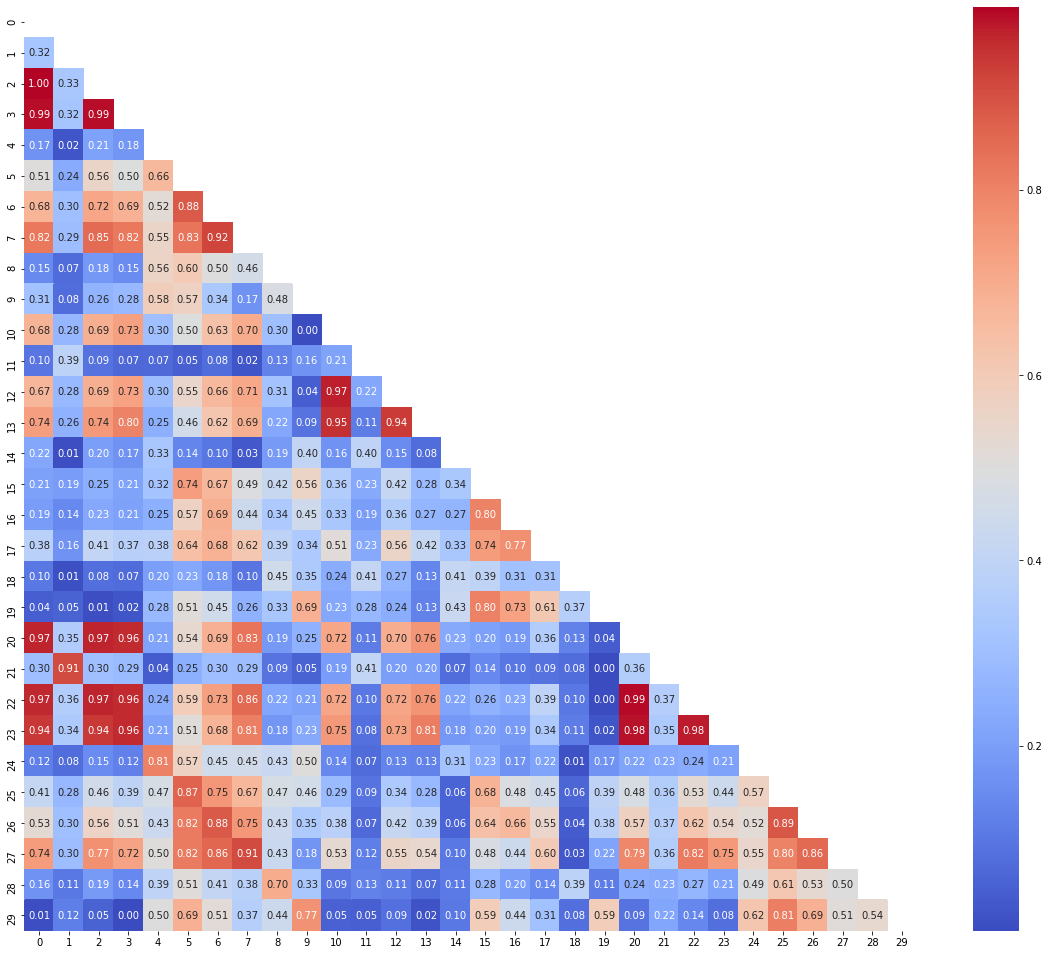

In [ ]:
fig, ax = plt.subplots(figsize = (20, 17)) 
mask = np.zeros_like(X_cancer.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(X_cancer.corr().abs(), mask = mask, ax = ax, cmap ='coolwarm', annot = True, fmt = '.2f')

Como podemos ver, há várias colunas altamente correlacionados no dataframe. Vamos excluir (automaticamente!) as colunas altamente correlacionadas da seguinte forma:

In [ ]:
set_variaveis_corr = set()
matrix_corr = X_cancer.corr()
matrix_corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
2,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
3,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
4,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
5,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
6,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
7,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
8,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
9,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
for i in range(len(matrix_corr.columns)):
    for j in range(i):
        if abs(matrix_corr.iloc[i, j]) > 0.8:
            colname = matrix_corr.columns[i]
            set_variaveis_corr.add(colname)

set_variaveis_corr

{2, 3, 6, 7, 12, 13, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29}

Deletando as colunas altamente correlacionadas do dataframe e calculando a correlação novamente:

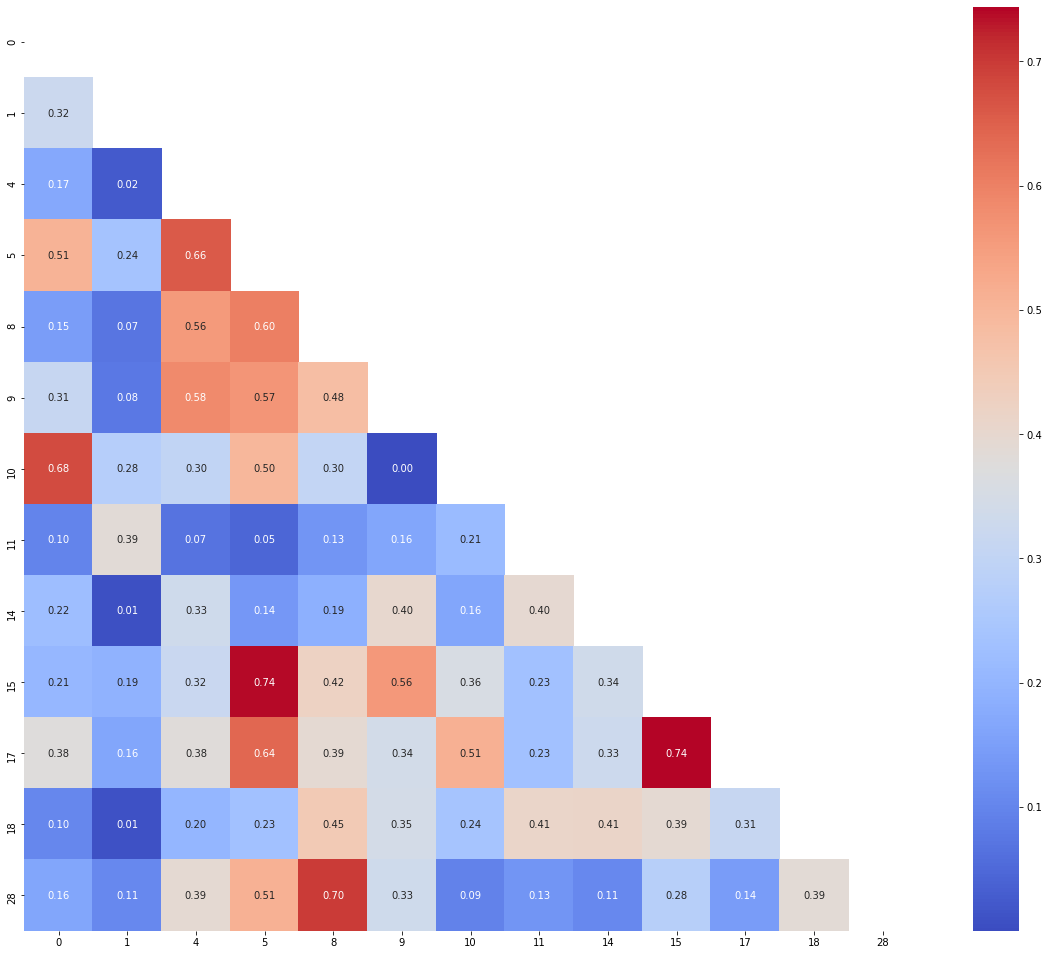

In [ ]:
X_cancer = X_cancer.drop(set_variaveis_corr, axis = 1)

fig, ax = plt.subplots(figsize = (20, 17)) 
mask = np.zeros_like(X_cancer.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(X_cancer.corr().abs(), mask = mask, ax = ax, cmap='coolwarm', annot = True, fmt = '.2f')

### **Conclusão**: Qual a conclusão podemos tirar esta análise?
* Reduzimos de 29 para 13 variáveis.

___
# **RFE - Recursive Feature Elimination** (continuação da Análise de Correlação)
* Muito tempo de processamento! Portanto, exclua as colunas altamente correlacionadas do dataframe previamente.
* A matriz X e target deste tópico vem do tópico anterior "Análise de Correlação";

* Leitura recomendada: [Feature Selection in Python — Recursive Feature Elimination](https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15)


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold

In [ ]:
rf = RandomForestRegressor(random_state = 20111974)
filtro_rfe = RFECV(estimator = rf, step = 1, cv = StratifiedKFold(10))

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=20111974,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

Ajustamos o modelo com o filtro aplicado anteriormente:

In [ ]:
filtro_rfe.fit(X_cancer, y_cancer)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=None,
                                      max_features='auto', max_leaf_nodes=None,
                                      max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=None,
                                      oob_score=False, random_state=20111974,
                                      verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

Dataframe original com 30 features:

In [ ]:
X_cancer.shape

(569, 7)

Dataframe depois do filtro RFE:

In [ ]:
# Número ótimo de colunas:
filtro_rfe.n_features_

AttributeError: ignored

In [ ]:
filtro_rfe.ranking_

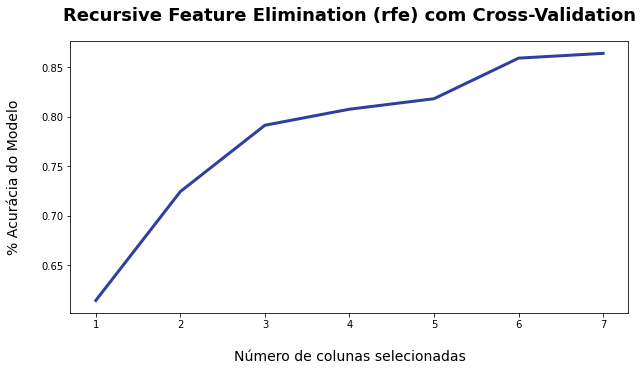

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('Recursive Feature Elimination (rfe) com Cross-Validation', fontsize = 18, fontweight = 'bold', pad = 20)
plt.xlabel('Número de colunas selecionadas', fontsize = 14, labelpad = 20)
plt.ylabel('% Acurácia do Modelo', fontsize = 14, labelpad = 20)
plt.plot(range(1, len(filtro_rfe.grid_scores_) + 1), filtro_rfe.grid_scores_, color = '#303F9F', linewidth = 3)
plt.show()

### **Conclusão**: Houve uma redução para 7 colunas.

In [ ]:
X_cancer.drop(X_cancer.columns[np.where(filtro_rfe.support_ == False)[0]], axis = 1)
X_cancer.head()

,1,7,20,21,22,23,27
0,10.38,0.14710,25.38,17.33,184.60,2019.0,0.2654
1,17.77,0.07017,24.99,23.41,158.80,1956.0,0.1860
2,21.25,0.12790,23.57,25.53,152.50,1709.0,0.2430
3,20.38,0.10520,14.91,26.50,98.87,567.7,0.2575
4,14.34,0.10430,22.54,16.67,152.20,1575.0,0.1625


In [ ]:
filtro_rfe.estimator_.feature_importances_

array([0.03653118, 0.12181473, 0.10786786, 0.0437514 , 0.27801978,
       0.16399009, 0.24802496])

___
# **Feature Selection com Random Forest**
* Para demonstrar este método, vou utilizar o Boston Housing Price dataframe.

![Supervised_X_Unsupervised](https://github.com/MathMachado/Materials/blob/master/Supervised_X_Unsupervised.jpeg?raw=true)

### Carregar o dataframe
* [Aqui](https://en.wikipedia.org/wiki/Iris_flower_data_set) você obterá mais informações sobre o dataframe iris. Confira.

In [ ]:
from sklearn.datasets import load_iris

# Função para carregar as informações do dataframe Iris
def carrega_df_iris():
    global df_iris, l_iris_labels, X_iris, y_iris, iris

    iris = load_iris()
    X_iris = iris['data']
    y_iris= iris['target']

    df_iris = pd.DataFrame(np.c_[X_iris, y_iris], columns= np.append(iris['feature_names'], ['target']))
    df_iris['target2']= df_iris['target']
    df_iris= df_iris.rename(columns={'sepal length (cm)': 'Sepal Length', 'sepal width (cm)': 'sepal width', 'petal length (cm)': 'petal length', 'petal width (cm)': 'petal width'})
    df_iris['target'] = df_iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

    # Criar a lista de nomes das variáveis
    l_iris_labels = ['Sepal Length','Sepal Width','Petal Length','Petal Width']

In [ ]:
# Carregar as informações do dataframe Iris
carrega_df_iris()

> A variável-resposta que estamos tentando prever/explicar é categórica. Portanto, vamos usar um algoritmo da classe supervisionado para Classificação.

* SelectFromModel selecionará os atributos cuja importância seja maior do que a importância média de todos os recursos por padrão, mas podemos alterar esse limite se quisermos.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Particionar base de treinamento (80%) e validação (20%)
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_iris, y_iris, test_size = 0.2, random_state = 20111974)

In [ ]:
X_treinamento.shape

(120, 4)

In [ ]:
X_teste.shape

(30, 4)

In [ ]:
# Create a random forest Regressor
ml_rf = RandomForestClassifier(n_estimators = 10000, random_state = 20111974, n_jobs = -1)

In [ ]:
# Treina o classificador
ml_rf.fit(X_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=20111974,
                       verbose=0, warm_start=False)

Os atributos mais importantes são:

In [ ]:
# Imprime o nome do atributo associado à importância usando índice de Gini
for feature in zip(l_iris_labels, ml_rf.feature_importances_):
    print(feature)

('Sepal Length', 0.08731002037613723)
('Sepal Width', 0.021750035432184116)
('Petal Length', 0.39132734233988486)
('Petal Width', 0.4996126018517938)


* Os scores acima representam a importância de cada variável.
    * A soma dos scores resulta em 100%;
    * Os atributos 'Petal Length' (Score= 0.45) e 'Petal Width' (Score= 0.42) são os mais importantes.
    * Combinados, as duas variáveis mais importantes somam ~0.86.

Como regra geral, selecione os atributos que tenha importância de no mínimo 0.15. 

Citar autor/Referência!!!

Algo mais visual:

In [ ]:
def importancia_variaveis():
    # Calcula a importância das features
    importances = ml_rf.feature_importances_

    # Ordena as features por importância
    indices = np.argsort(importances)[::-1]

    # Associa a feature name com a feature importance
    names = [iris.feature_names[i] for i in indices]

    # Barplot
    plt.bar(range(X_treinamento.shape[1]), importances[indices])

    # Adiciona as feature names no eixo x-axis
    plt.xticks(range(X_treinamento.shape[1]), names, rotation = 20, fontsize = 8)

    # Define o título do gráfico
    plt.title("Importância Preditiva das variáveis")
    plt.show()

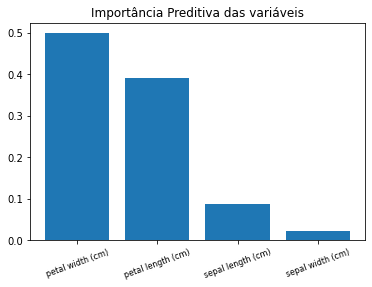

In [ ]:
importancia_variaveis()

## Análise de Correlação

In [ ]:
# calcula a correlação entre as colunas/variáveis do dataframe
correlacao = df_iris.corr().abs()

# Seleciona o triângulo superior da matriz de correlação
correlacao = correlacao.where(np.triu(np.ones(correlacao.shape), k = 1).astype(np.bool))
correlacao

,Sepal Length,sepal width,petal length,petal width,target2
Sepal Length,NaN,0.11757,0.871754,0.817941,0.782561
sepal width,NaN,NaN,0.428440,0.366126,0.426658
petal length,NaN,NaN,NaN,0.962865,0.949035
petal width,NaN,NaN,NaN,NaN,0.956547
target2,NaN,NaN,NaN,NaN,NaN


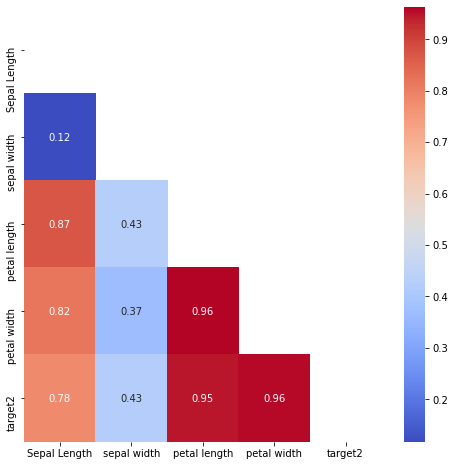

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8)) 
mask = np.zeros_like(df_iris.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_iris.corr().abs(), mask = mask, ax = ax, cmap ='coolwarm', annot = True, fmt = '.2f')

> Pela Análise de Correlação, vemos duas variáveis altamente correlacionadas com a variável-resposta, que são: 'Petal Width' e 'Petal Length', que são as duas variáveis mais importantes no dataframe. Lembram-se?
>> No entanto, confira a correlação entre 'Petal Width' e 'Petal Length'. Observou que a correlação entre elas é de 0.96? Estas variáveis são altamente correlacionadas...

### Usando SelectFromModel()

In [ ]:
# A partir do Random Forest, seleciona features cuja importância seja maior que 0.15 e 0.45
sfm = SelectFromModel(rf, threshold = 0.15)
sfm_2 = SelectFromModel(rf, threshold = 0.45)

# Treina o seletor
sfm.fit(X_treinamento, y_treinamento)
sfm_2.fit(X_treinamento, y_treinamento)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=20111974,
                                                verbose=0,

Se usarmos o corte de 0.15:

In [ ]:
# Mostra as duas features mais importantes para sfm
for feature_list_index in sfm.get_support(indices = True):
    print(l_iris_labels[feature_list_index])

Petal Length
Petal Width


Se usarmos o corte de 0.45:

In [ ]:
# Mostra as duas features mais importantes para sfm_2
for feature_list_index in sfm_2.get_support(indices = True):
    print(l_iris_labels[feature_list_index])

Petal Width


Selecionando somente os atributos mais importantes:

In [ ]:
# Constroi um dataset contendo somente as variáveis mais importantes
# Nota: Neste caso, estamos a aplicar a transformação tanto na base de treinamento quanto de validação
X_treinamento_rfi = sfm.transform(X_treinamento)
X_teste_rfi = sfm.transform(X_teste)

X_treinamento_rfi_2 = sfm_2.transform(X_treinamento)
X_teste_rfi_2 = sfm_2.transform(X_teste)

In [ ]:
# Criar um classificador Random Forest somente com as features mais importantes
clf_rfi = RandomForestClassifier(n_estimators = 10000, random_state = 20111974, n_jobs = 50)
clf_rfi_2 = RandomForestClassifier(n_estimators = 10000, random_state = 20111974, n_jobs = 50)

# Treina o modelo com as features mais importantes
clf_rfi.fit(X_treinamento_rfi, y_treinamento)
clf_rfi_2.fit(X_treinamento_rfi_2, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=50, oob_score=False, random_state=20111974,
                       verbose=0, warm_start=False)

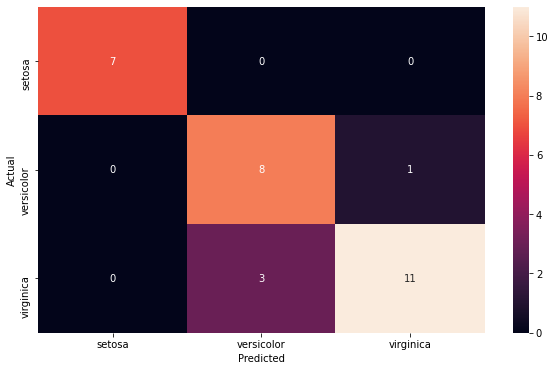

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm

# Aplica o Classificador no dataframe teste
y_pred = clf_rfi.predict(X_teste_rfi)

# Verifica acurácia
accuracy_score(y_teste, y_pred)

# Matriz de Confusão
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_teste, y_pred)  
index = ['setosa', 'versicolor', 'virginica']  
columns = ['setosa','versicolor', 'virginica']  
cm_df = pd.DataFrame(cm, columns, index)                      
plt.figure(figsize = (10, 6))  
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot = True)

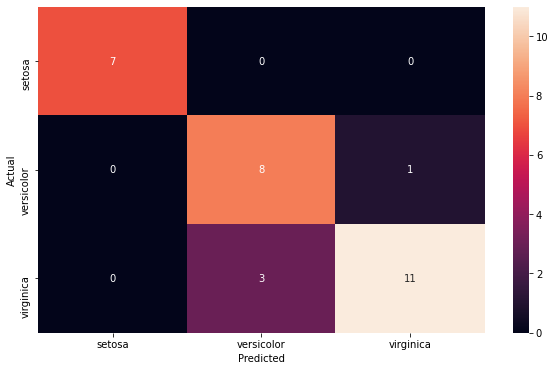

In [ ]:
# Aplica o classificador na base de teste depois da análise de correlação
y_pred_rfi_2 = clf_rfi_2.predict(X_teste_rfi_2)

# Avalia acurácia
accuracy_score(y_teste, y_pred_rfi_2)

# Matriz de Confusão
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_teste, y_pred_rfi_2)  
index = ['setosa','versicolor', 'virginica']  
columns = ['setosa','versicolor', 'virginica']  
cm_df = pd.DataFrame(cm,columns, index)                      
plt.figure(figsize = (10, 6))  
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot = True)

> Como podemos ver:
* Modelo original (com 4 atributos) presenta acurácia de 93.3%;
* Modelo reduzido (com 2 atributos e ponto de corte de 0.15) apresenta acurácia de 93%;
* Modelo reduzido 2 (com 1 atributo e ponto de corte de 0.45) apresenta acurácia de 93%.

>> Ou seja, reduzimos o modelo de 4 para 1 atributo/variável e a acurária continua a mesma.

In [ ]:
# Correlação dois a dois...
df_iris[['petal length', 'petal width']].corr()

,petal length,petal width
petal length,1.000000,0.962865
petal width,0.962865,1.000000


## Feature Selection With XGBoost (Extreme Gradient Boosting)
> XGBoost, em geral, fornece melhores soluções do que outros algoritmos de Machine Learning.

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Carregar as informações do dataframe Iris
carrega_df_iris()

In [ ]:
# Cria um clasificador XGBoost
clf = XGBClassifier(n_estimators = 10000, random_state = 20111974, n_jobs = 50, max_depth = 5, learning_rate = 0.05)

# Treina o classificador
clf.fit(X_treinamento, y_treinamento)

# Calcula o y_pred e avalia a qualidade do ajuste
y_pred = clf.predict(X_teste)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_teste, predictions)
print(f"Acurácia: {accuracy}")

Acurácia: 0.8666666666666667


In [ ]:
# Adaptado de https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
# Ajusta o ML usando cada importância calculada como threshold

thresholds = sorted(clf.feature_importances_)
for thresh in thresholds:
	# seleciona as features usando threshold
	selection = SelectFromModel(clf, threshold=thresh, prefit=True)
	select_X_treinamento = selection.transform(X_treinamento)
	
    # treina o ML
	selection_clf = XGBClassifier()
	selection_clf.fit(select_X_treinamento, y_treinamento)
	
    # Avalia o ML
	select_X_teste = selection.transform(X_teste)
	y_pred = selection_clf.predict(select_X_teste)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_teste, predictions)
	print(f"Threshold= {round(thresh,2)}, n= {select_X_treinamento.shape[1]}, Acurácia: {round(accuracy*100.0,2)}")

Threshold= 0.009999999776482582, n= 4, Acurácia: 86.67
Threshold= 0.03999999910593033, n= 3, Acurácia: 86.67
Threshold= 0.44999998807907104, n= 2, Acurácia: 86.67
Threshold= 0.5, n= 1, Acurácia: 86.67


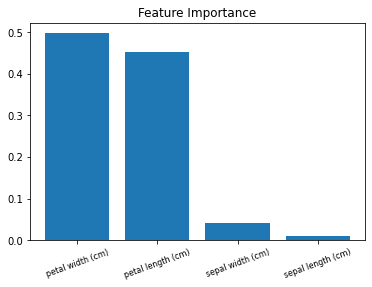

In [ ]:
# Calcula a importância das features
importances = clf.feature_importances_

# Ordena as importâncias por ordem descendente
indices = np.argsort(importances)[::-1]

# Organiza...
names = [iris.feature_names[i] for i in indices]

# Barplot
plt.bar(range(X_treinamento.shape[1]), importances[indices])

# Coloca o nome dos labels no eixo X
plt.xticks(range(X_treinamento.shape[1]), names, rotation=20, fontsize = 8)

# Constroi o gráfico
plt.title("Feature Importance")

# Mostra o gráfico
plt.show()

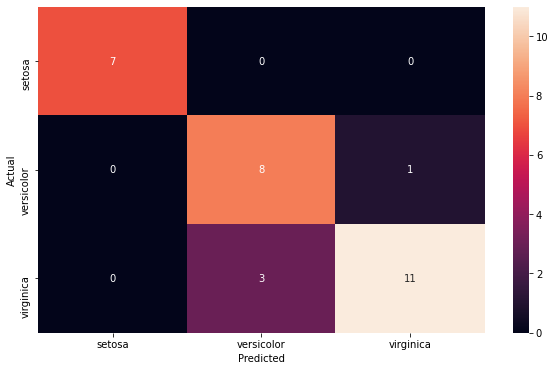

In [ ]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix as cm
cm = cm(y_teste, y_pred)  
index = ['setosa','versicolor','virginica']  
columns = ['setosa','versicolor','virginica']  
cm_df = pd.DataFrame(cm,columns,index)                      
plt.figure(figsize = (10, 6))  
cm_df.index.name = 'Actual'
cm_df.columns.name = 'Predicted'
sns.heatmap(cm_df, annot=True)

## Feature Selection using PCA (Principal Components Analysis)

In [ ]:
from sklearn.datasets import load_iris

# Carregar as informações do dataframe Iris
carrega_df_iris()

### Standardize the Data
* O PCA é afetado por escala, portanto, é necessário dimensionar as features/atributos antes de aplicar o PCA.
* Use o StandardScaler para padronizar os features/atributos usando com média = 0 e variância = 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Standardizing as features de X:

In [ ]:
X_STD = StandardScaler().fit_transform(X_iris) 

In [ ]:
pca_2c = PCA(n_components = 2)
X_PCA_2c = pca_2c.fit_transform(X_STD)
df_PCA_2c = pd.DataFrame(data = X_PCA_2c, columns = ['PCA1', 'PCA2'])

Vamos entender o que está acontecendo:

Primeiramente, observe nosso array X abaixo. Cada coluna desse array representa uma coluna do dataframe df_iris. Por exemplo, a primeira coluna são os dados da variável 'Sepal Length'. Identificou?

In [ ]:
# Listando as primeiras 5 linhas de X
X_iris[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Segundo, com a standardização, construimos o array X_STD, que mostramos abaixo:

In [ ]:
X_STD[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Veja abaixo a média e desvio-padrão do array X_STD:

In [ ]:
np.mean(X_STD),np.std(X_STD)

(-1.4684549872375404e-15, 1.0)

Temos média 0 e desvio-padrão 1, certo? É isso que queríamos.

Por fim, a partir de X_STD, construimos o array X_PCA_2c, mostrado abaixo:

In [ ]:
X_PCA_2c[0:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

Portanto, reduzimos (ou resumimos) o array X_STD de 4 dimensões para um array de 2 dimensões.

Finalmente, o dataframe final é mostrado abaixo:

In [ ]:
df_PCA_final_2c = pd.concat([df_PCA_2c, df_iris[['target']]], axis= 1)

In [ ]:
df_PCA_final_2c.head()

,PCA1,PCA2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


### Visualizar reultados

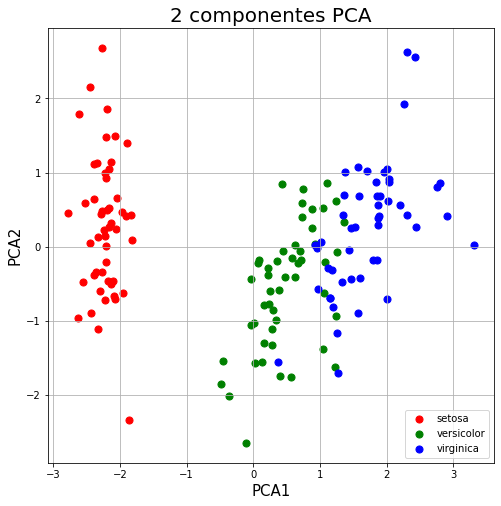

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PCA1', fontsize = 15)
ax.set_ylabel('PCA2', fontsize = 15)
ax.set_title('2 componentes PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_PCA_final_2c['target'] == target
    ax.scatter(df_PCA_final_2c.loc[indicesToKeep, 'PCA1']
               , df_PCA_final_2c.loc[indicesToKeep, 'PCA2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

O que significa reduzir para 2 dimensões um array com 4 dimensões?

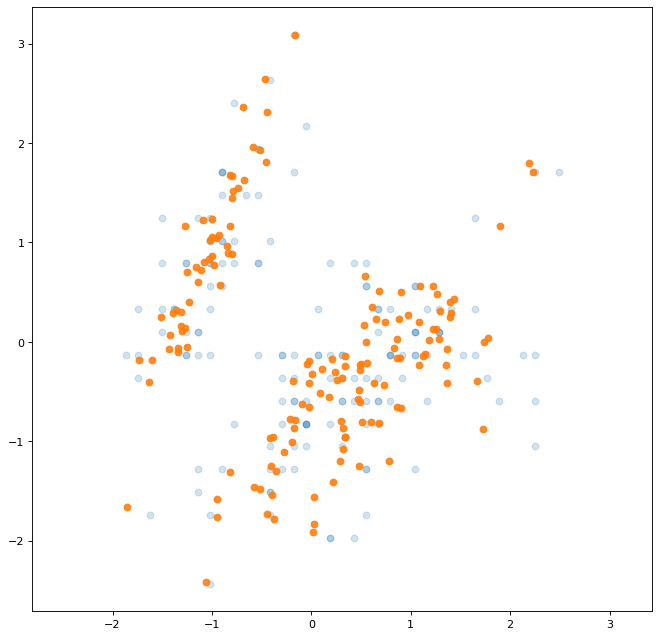

In [ ]:
X_new = pca_2c.inverse_transform(X_PCA_2c)
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(X_STD[:, 0], X_STD[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.axis('equal');

### Análise de Correlação

In [ ]:
# calcula a correlação entre as colunas/variáveis do dataframe
correlacao= df_iris.corr().abs()

# Seleciona o triângulo superior da matriz de correlação
correlacao = correlacao.where(np.triu(np.ones(correlacao.shape), k=1).astype(np.bool))
correlacao

,Sepal Length,sepal width,petal length,petal width,target2
Sepal Length,NaN,0.11757,0.871754,0.817941,0.782561
sepal width,NaN,NaN,0.428440,0.366126,0.426658
petal length,NaN,NaN,NaN,0.962865,0.949035
petal width,NaN,NaN,NaN,NaN,0.956547
target2,NaN,NaN,NaN,NaN,NaN


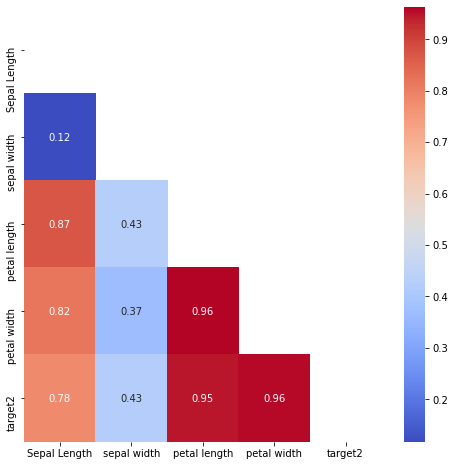

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8)) 
mask = np.zeros_like(df_iris.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_iris.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True, fmt= '.2f')

Pela Análise de Correlação, vemos duas variáveis altamente correlacionadas com a variável-resposta, que são: 'Peta Width' e 'Petal Length', que são as duas variáveis mais importantes no dataframe. Lembram-se?

### Variância explicada
* Como vimos, reduzimos um array de informações de 4 dimensões para um array com 2 dimensões. Com isso, perde-se alguma informação relativa à variância. Mas quanto perdemos?

* A Variância Explicada (ou Explained Variance, em inglês), mede o quanto de informação (variação) foi atribuída a cada um dos componentes principais. Usando o atributo explain_variance_ratio_, é possível ver que o primeiro componente principal contém 72,77% da variação e o segundo componente principal contém 23,03% da variação. Juntos, os dois componentes contêm 95,80% das informações. Portanto, perdemos quase nada em termos de informação e o modelo não é prejudicado por esta redução.


A resposta à essa pergunta é:

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

Observe que o terceiro e quarto valores são muito baixo. Ou seja, baixa variabilidade explicada... Portanto, daqui já conseguimos ver que o número ideal de componentes são 2.

### Quantos componentes escolher

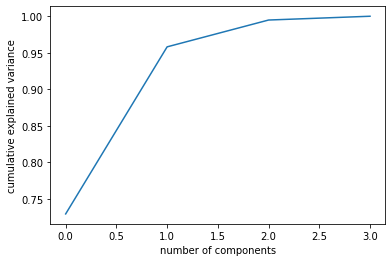

In [ ]:
pca = PCA().fit(X_STD)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**Interpretação**: Esta curva quantifica quanto da variância total de 4 dimensões está contida nos primeiros N componentes. Por exemplo, a primeira componente principal tem aproximadamente 95% da variação, enquanto que 2 componentes (os dois primeiros) explicam quase 100% da variabilidade. Portanto, em nosso caso, 2 componentes principais são suficientes para captar grande parte da variabilidade dos dados.

In [ ]:
pca.explained_variance_ratio_

### Medindo o impacto

#### Treinar o modelo com X_PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_PCA_2c, y_iris, test_size = 0.2, random_state = 20111974)

In [ ]:
# Optamos por 2 componentes principais
classifier_2c = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier_2c.fit(X_treinamento, y_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### Fazer as predições

In [ ]:
y_pred_2c = classifier_2c.predict(X_teste)

___
# **Exercícios**
* Para cada um dos dataframes a seguir, selecione os melhores atributos utilizando as seguintes técnicas técnicas:
    * Random Forest
    * XGBoost
    * RFE

## Exercício 1 - Breast Cancer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X= cancer['data']
y= cancer['target']

df_cancer = pd.DataFrame(np.c_[X, y], columns= np.append(cancer['feature_names'], ['target']))
df_cancer['target'] = df_cancer['target'].map({0: 'malign', 1: 'benign'})
df_cancer.head()

## Exercício 2 - Fraud Detection

In [ ]:
import pandas as pd
import numpy as np

url= 'https://raw.githubusercontent.com/MathMachado/Python_RFB/DS_Python/Dataframes/creditcard.csv?token=AGDJQ63IAZCFP7GTSZTOMAK5QBSP6'
df_CC= pd.read_csv(url)
df_CC.head()

## Exercício 3 - Boston Housing Price

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
X= boston['data']
y= boston['target']

df_boston = pd.DataFrame(np.c_[X, y], columns= np.append(boston['feature_names'], ['target']))
df_boston.head()

## Exercício 4 - Diabetes


In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X= diabetes['data']
y= diabetes['target']

df_diabetes = pd.DataFrame(np.c_[X, y], columns= np.append(diabetes['feature_names'], ['target']))
df_diabetes.head()

## Exercício 5 - Crimes

In [ ]:
url= 'https://raw.githubusercontent.com/MathMachado/Python_RFB/DS_Python/Dataframes/Crime.txt?token=AGDJQ665WUIWIEKDPK6WO625P3QUQ'
df_Crime = pd.read_table(url, sep=',', na_values='?')
df_Crime.shape

In [ ]:
df_Crime.head()

## Exercício 6 - Titanic